## Here I will, 
* Compress racoon grey scale image into 5 clusters.
* And visualize both raw and compressed image and look for quality difference.

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import scipy
from sklearn import cluster, datasets
from sklearn.cluster import KMeans
from scipy import misc
%matplotlib inline
import cv2

In [62]:
img = scipy.misc.face()

## Original Image show

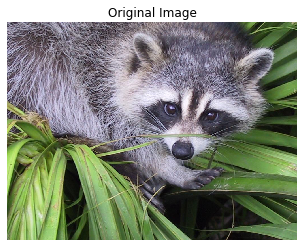

In [64]:
plt.imshow(img)
plt.axis('off')
plt.title('Original Image')
plt.show()

In [65]:
img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

In [66]:
img_gray.shape

(768, 1024)

## After converting into Grayscaled Image

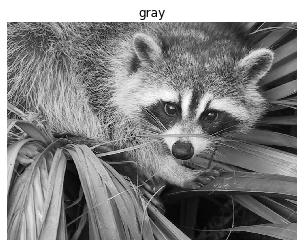

In [67]:
plt.imshow(img_gray,cmap='gray')
plt.axis('off')
plt.title('gray')
plt.show()

In [68]:
df = pd.DataFrame(img_gray)

In [69]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
0,117,134,149,151,151,154,155,152,143,133,...,167,162,159,150,135,121,115,118,128,136
1,86,107,127,134,138,145,149,148,161,151,...,160,155,148,137,122,109,107,117,133,145
2,70,91,112,120,124,128,129,126,136,132,...,151,144,125,119,109,103,105,117,133,144
3,80,96,112,119,124,125,119,110,100,100,...,132,122,103,105,107,110,113,117,122,126
4,102,112,122,131,141,146,139,126,108,100,...,104,93,97,103,112,118,119,116,112,110


In [70]:
df.shape

(768, 1024)

## k-means clustering using 5 clusters

In [71]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++',max_iter=800, random_state = 0)
y_kmeans = kmeans.fit_predict(df)

In [72]:
centers = kmeans.cluster_centers_

In [73]:
centerx = centers[:,0]
centery = centers[:,1]

In [74]:
len(y_kmeans),len(df)

(768, 768)

In [75]:
df['Class'] = y_kmeans

In [76]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,1015,1016,1017,1018,1019,1020,1021,1022,1023,Class
0,117,134,149,151,151,154,155,152,143,133,...,162,159,150,135,121,115,118,128,136,1
1,86,107,127,134,138,145,149,148,161,151,...,155,148,137,122,109,107,117,133,145,1
2,70,91,112,120,124,128,129,126,136,132,...,144,125,119,109,103,105,117,133,144,1
3,80,96,112,119,124,125,119,110,100,100,...,122,103,105,107,110,113,117,122,126,1
4,102,112,122,131,141,146,139,126,108,100,...,93,97,103,112,118,119,116,112,110,1


## Seperating into different classes

In [77]:
zero = df[df['Class']==0] 
one = df[df['Class']==1]
two = df[df['Class']==2]
three = df[df['Class']==3]
four = df[df['Class']==4]

In [78]:
zero_img = zero.copy()
one_img = one.copy()
two_img = two.copy()
three_img = three.copy()
four_img = four.copy()
del df['Class']

## separate Images of every classes

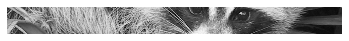

In [79]:
plt.imshow(zero_img,cmap='gray')
plt.axis('off')
plt.show()

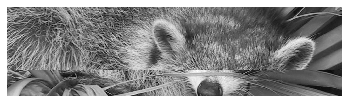

In [80]:
plt.imshow(one_img,cmap='gray')
plt.axis('off')
plt.show()

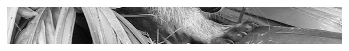

In [81]:
plt.imshow(two_img,cmap='gray')
plt.axis('off')
plt.show()

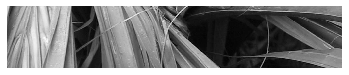

In [82]:
plt.imshow(three_img,cmap='gray')
plt.axis('off')
plt.show()

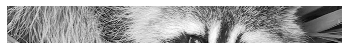

In [83]:
plt.imshow(four_img,cmap='gray')
plt.axis('off')
plt.show()

In [84]:
print(f'Number of data points :-\nzero class:{len(zero_img)}\nOne class:{len(one_img)}\nTwo class:{len(two_img)}\nThree class:{len(three_img)}\nFour class:{len(four_img)}')

Number of data points :-
zero class:82
One class:272
Two class:114
Three class:188
Four class:112


In [85]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
0,117,134,149,151,151,154,155,152,143,133,...,167,162,159,150,135,121,115,118,128,136
1,86,107,127,134,138,145,149,148,161,151,...,160,155,148,137,122,109,107,117,133,145
2,70,91,112,120,124,128,129,126,136,132,...,151,144,125,119,109,103,105,117,133,144
3,80,96,112,119,124,125,119,110,100,100,...,132,122,103,105,107,110,113,117,122,126
4,102,112,122,131,141,146,139,126,108,100,...,104,93,97,103,112,118,119,116,112,110


## Compressing Data using PCA

In [86]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [87]:
pca = PCA(n_components=2,random_state=0)
scaler = StandardScaler()
X =scaler.fit_transform(df)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=0,
    svd_solver='auto', tol=0.0, whiten=False)

In [88]:
X = pca.transform(X)

In [89]:
X = pd.DataFrame(X,columns=['1st','2nd'])

## Again clustering using compressed Data

In [90]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++',max_iter=500, random_state = 0)
y_kmeans = kmeans.fit_predict(X)

In [91]:
centers = kmeans.cluster_centers_

In [92]:
centerx = centers[:,0]
centery = centers[:,1]

In [93]:
X['Class'] = y_kmeans

In [94]:
X.head()

,1st,2nd,Class
0,2.770496,4.120022,3
1,2.477963,3.869899,3
2,1.195132,2.534619,3
3,0.240896,1.391465,3
4,0.867917,1.935887,3


In [95]:
X['Class'].unique()

array([3, 0, 4, 1, 2])

## Plot of different classes and also showing the centroids points of each class

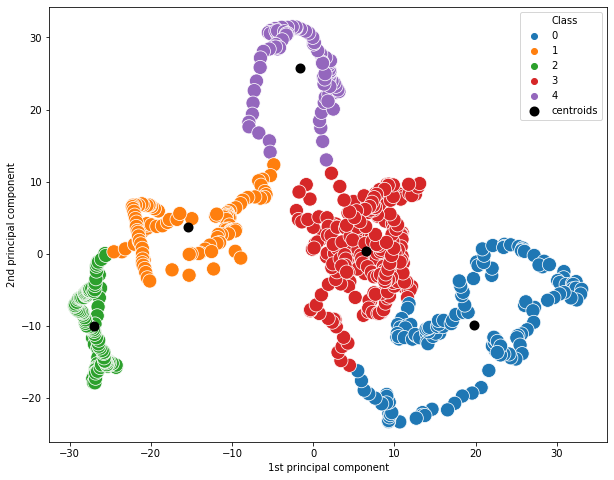

In [96]:
plt.figure(figsize=(10,8))
sns.scatterplot(X['1st'],X['2nd'],hue=X['Class'],s=200,markers='o',palette='tab10')
plt.scatter(centerx,centery,color='k',marker='o',linewidths=4,label='centroids')
plt.xlabel('1st principal component')
plt.ylabel('2nd principal component')
plt.legend()
plt.show()

In [97]:
df['Class'] = y_kmeans

## Again seperating into classes for new compressed data

In [98]:
zero = df[df['Class']==0] 
one = df[df['Class']==1]
two = df[df['Class']==2]
three = df[df['Class']==3]
four = df[df['Class']==4]

In [99]:
zero_img = zero.copy()
one_img = one.copy()
two_img = two.copy()
three_img = three.copy()
four_img = four.copy()
del df['Class']

## Now finally images of each classes with compressed data

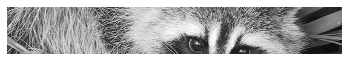

In [100]:
plt.imshow(zero_img,cmap='gray')
plt.axis('off')
plt.show()

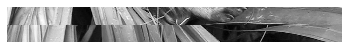

In [101]:
plt.imshow(one_img,cmap='gray')
plt.axis('off')
plt.show()

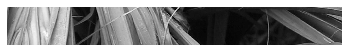

In [102]:
plt.imshow(two_img,cmap='gray')
plt.axis('off')
plt.show()

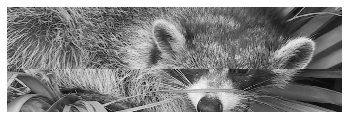

In [103]:
plt.imshow(three_img,cmap='gray')
plt.axis('off')
plt.show()

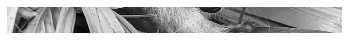

In [104]:
plt.imshow(four_img,cmap='gray')
plt.axis('off')
plt.show()

In [105]:
print(f'Number of data points after doing compression :-\nzero class:{len(zero_img)}\nOne class:{len(one_img)}\nTwo class:{len(two_img)}\nThree class:{len(three_img)}\nFour class:{len(four_img)}')

Number of data points after doing compression :-
zero class:144
One class:106
Two class:117
Three class:321
Four class:80
